In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('Crop_Recommendation.csv')

# Split the data into features and target variable
X = data.drop('label', axis=1)
y = data['label']

# Split the dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Use 5-fold cross-validation to determine the best k for k-NN classifier
k_values = list(range(1, 51))
k_fold = KFold(n_splits=5)
mean_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=k_fold, scoring='accuracy')
    mean_scores.append(scores.mean())

# Get the best k value and its accuracy
best_k = k_values[mean_scores.index(max(mean_scores))]

# Train k-NN classifier on the full training set using the best k and predict on test set
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Best k: {best_k}")
print(f"Test set accuracy using best k: {accuracy:.4f}")

 


Best k: 1
Test set accuracy using best k: 0.9659


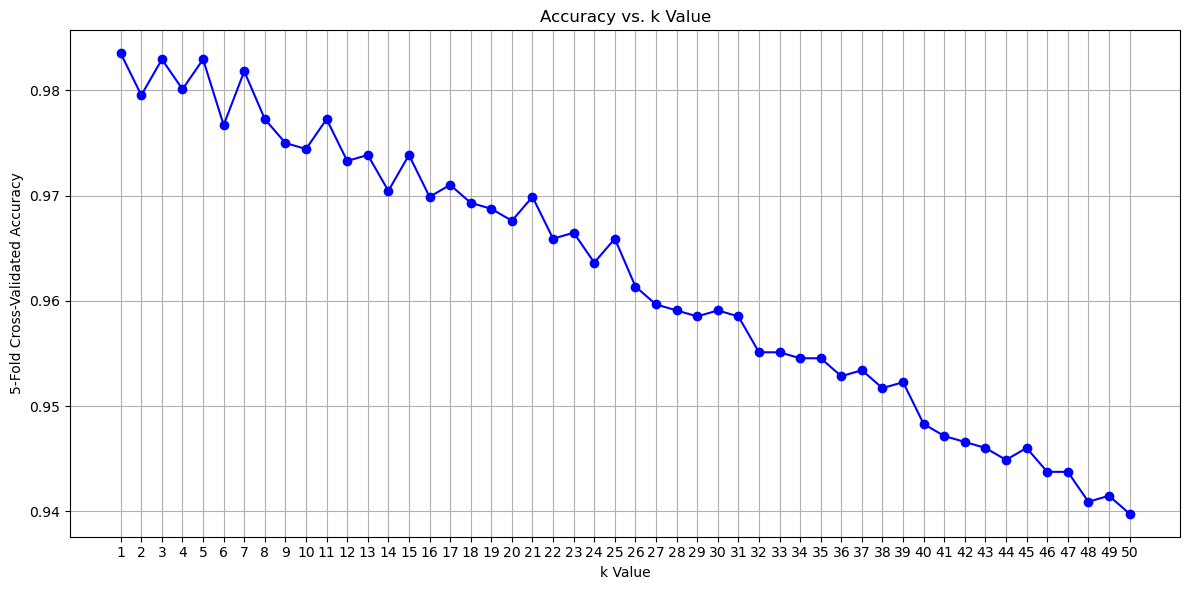

In [3]:
import matplotlib.pyplot as plt

# 使用matplotlib绘制图像
plt.figure(figsize=(12,6))
plt.plot(k_values, mean_scores, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. k Value')
plt.xlabel('k Value')
plt.ylabel('5-Fold Cross-Validated Accuracy')
plt.grid(True)
plt.xticks(k_values)
plt.tight_layout()
plt.show()


Best k: 1
Test set accuracy using best k: 0.9659


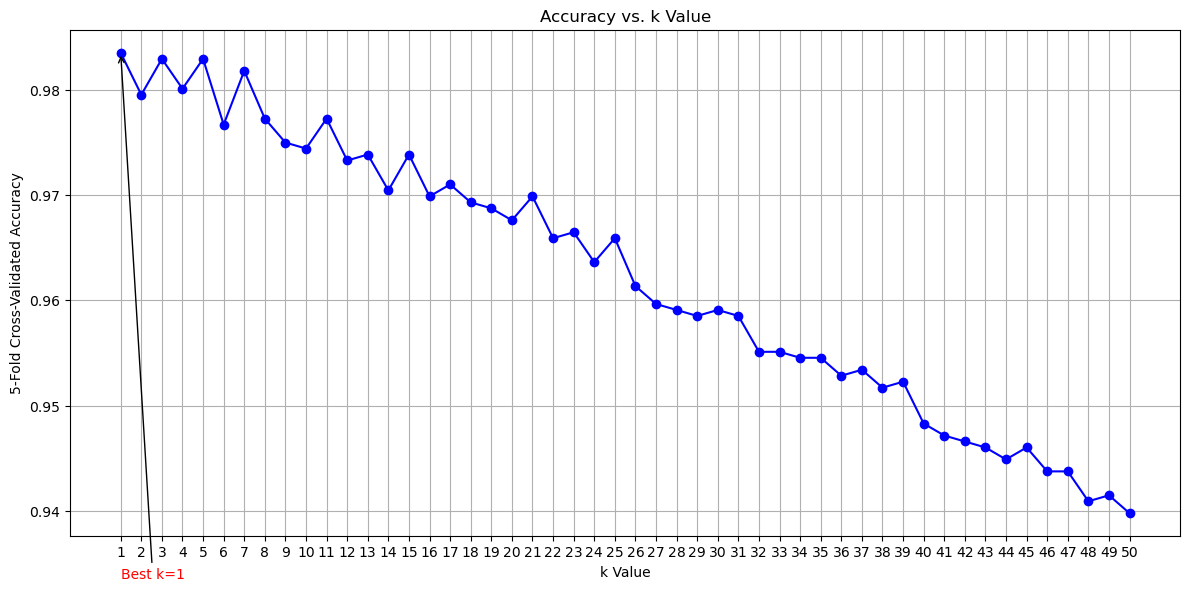

k=1, accuracy=0.9835
k=2, accuracy=0.9795
k=3, accuracy=0.9830
k=4, accuracy=0.9801
k=5, accuracy=0.9830
k=6, accuracy=0.9767
k=7, accuracy=0.9818
k=8, accuracy=0.9773
k=9, accuracy=0.9750
k=10, accuracy=0.9744
k=11, accuracy=0.9773
k=12, accuracy=0.9733
k=13, accuracy=0.9739
k=14, accuracy=0.9705
k=15, accuracy=0.9739
k=16, accuracy=0.9699
k=17, accuracy=0.9710
k=18, accuracy=0.9693
k=19, accuracy=0.9688
k=20, accuracy=0.9676
k=21, accuracy=0.9699
k=22, accuracy=0.9659
k=23, accuracy=0.9665
k=24, accuracy=0.9636
k=25, accuracy=0.9659
k=26, accuracy=0.9614
k=27, accuracy=0.9597
k=28, accuracy=0.9591
k=29, accuracy=0.9585
k=30, accuracy=0.9591
k=31, accuracy=0.9585
k=32, accuracy=0.9551
k=33, accuracy=0.9551
k=34, accuracy=0.9545
k=35, accuracy=0.9545
k=36, accuracy=0.9528
k=37, accuracy=0.9534
k=38, accuracy=0.9517
k=39, accuracy=0.9523
k=40, accuracy=0.9483
k=41, accuracy=0.9472
k=42, accuracy=0.9466
k=43, accuracy=0.9460
k=44, accuracy=0.9449
k=45, accuracy=0.9460
k=46, accuracy=0.94

In [8]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('Crop_Recommendation.csv')

# Split the data into features and target variable
X = data.drop('label', axis=1)
y = data['label']

# Split the dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Use 5-fold cross-validation to determine the best k for k-NN classifier
k_values = list(range(1, 51))
k_fold = KFold(n_splits=5)
mean_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=k_fold, scoring='accuracy')
    mean_scores.append(scores.mean())

# Get the best k value and its accuracy
best_k = k_values[mean_scores.index(max(mean_scores))]

# Train k-NN classifier on the full training set using the best k and predict on test set
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Best k: {best_k}")
print(f"Test set accuracy using best k: {accuracy:.4f}")

# Plotting the accuracy vs k values
plt.figure(figsize=(12, 6))
plt.plot(k_values, mean_scores, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. k Value')
plt.xlabel('k Value')
plt.ylabel('5-Fold Cross-Validated Accuracy')
plt.grid(True)
plt.xticks(k_values)
plt.annotate(f'Best k={best_k}', xy=(best_k, max(mean_scores)), 
             xytext=(best_k, max(mean_scores)-0.05),
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=10, color='red')
plt.tight_layout()
plt.show()

for k, score in zip(k_values, mean_scores):
    print(f'k={k}, accuracy={score:.4f}')

best_k = k_values[mean_scores.index(max(mean_scores))]
print(best_k)

Question 2. (ROC Curve)
Convert the problem in the Crop Recommendation Dataset into a binary classification task (rice
versus non-rice). We can do so by replacing the class labels of the instances to non-rice except for
those that belong to the rice class.
Create a training set that contains 80% of the labeled data and create a test set that contains the
remaining 20%. Train a logistic regression classifier using the training set. Plot the ROC curve for
the rice class (positive class) when applying the logistic regression classifier to the test set. Submit
the plot and the source code.
[Hints: Use class LogisticRegression from sklearn.linear_model. Use roc_curve from
sklearn.metrics for computing the ROC Curve. Use matplotlib.pyplot to plot the ROC
curve. You can get the probability score used for computing ROC curve by using the method
predict_proba in the LogisticRegression class].

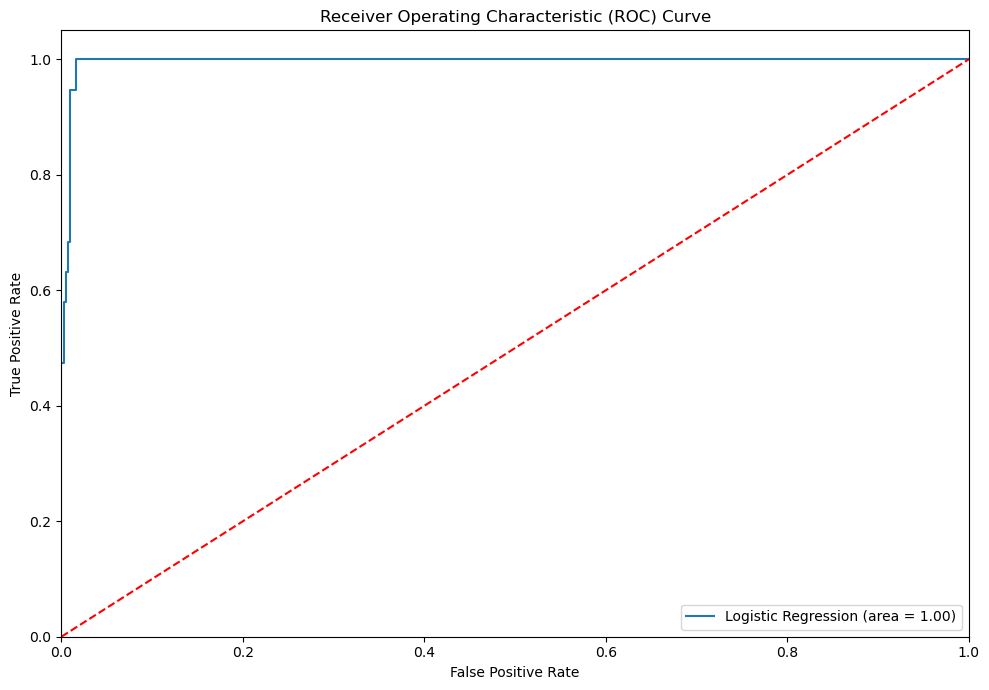

In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('Crop_Recommendation.csv')

# Convert the dataset to binary classification (rice vs non-rice)
df['label'] = np.where(df['label'] == 'rice', 'rice', 'non-rice')

# Split data into features and target variable
X = df.drop('label', axis=1)
y = np.where(df['label'] == 'rice', 1, 0)  # 1 for rice, 0 for non-rice

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression classifier
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Get the probability scores
y_scores = clf.predict_proba(X_test)[:,1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Plotting the ROC Curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'Logistic Regression (area = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


In [11]:
# 导入所需的库
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 加载数据
data = pd.read_csv("Crop_Recommendation.csv")
X = data.drop('label', axis=1)
y = data['label']

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# 初始化变量
best_k = 1
best_score = 0

# 使用5折交叉验证来找到最佳的k值
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for k in range(1, 51):  # [1,50]
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=kf, scoring='accuracy')
    mean_score = scores.mean()
    if mean_score > best_score:
        best_k = k
        best_score = mean_score

# 使用最佳的k值训练k-NN模型
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

# 在测试集上评估模型
y_pred = knn_best.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Best k: {best_k}")
print(f"Test set accuracy using best k: {accuracy:.4f}")


Best k: 1
Test set accuracy using best k: 0.9659


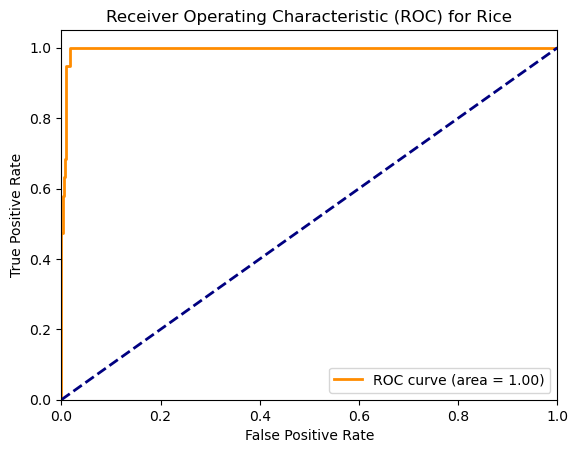

In [12]:
# 导入所需的库
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# 加载数据
data = pd.read_csv("Crop_Recommendation.csv")

# 将标签转换为二分类任务（rice vs non-rice）
data['label'] = data['label'].apply(lambda x: 'rice' if x == 'rice' else 'non-rice')

# 定义特征和标签
X = data.drop('label', axis=1)
y = data['label']

# 划分数据为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# 训练逻辑回归模型
logreg = LogisticRegression(max_iter=10000)  # 使用较大的max_iter确保收敛
logreg.fit(X_train, y_train)

# 获取测试集上的概率分数
y_prob = logreg.predict_proba(X_test)[:,1]  # 取标签为'rice'的概率

# 计算ROC曲线
fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label='rice')
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Rice')
plt.legend(loc="lower right")
plt.show()


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset (make sure to adjust the file path)
data = pd.read_csv('Crop_Recommendation.csv')

# Extract features (X) and target labels (y)
X = data.drop(columns=['label'])
y = data['label']

# Split the data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the range of k values to consider
k_values = range(1, 51)

# Initialize variables to store the best k value and accuracy
best_k = 0
best_accuracy = 0

# Perform 5-fold cross-validation to select the best k
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for k in k_values:
    fold_accuracies = []
    for train_index, val_index in kf.split(X_train):
        # Split the training set into training and validation for each fold
        X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_fold_train, y_fold_val = y_train.iloc[train_index], y_train.iloc[val_index]

        # Create and train the k-NN classifier
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_fold_train, y_fold_train)

        # Evaluate accuracy on the validation fold
        accuracy = knn.score(X_fold_val, y_fold_val)
        fold_accuracies.append(accuracy)

    # Calculate the mean accuracy across folds for this k
    mean_accuracy = sum(fold_accuracies) / len(fold_accuracies)

    # Update best_k and best_accuracy if necessary
    if mean_accuracy > best_accuracy:
        best_k = k
        best_accuracy = mean_accuracy

# Train the k-NN classifier with the best k value on the entire training set
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

# Evaluate the classifier's performance on the test set
test_accuracy = best_knn.score(X_test, y_test)

# Print the best k value and test accuracy
print(f"Best k value: {best_k}")
print(f"Test accuracy with k={best_k}: {test_accuracy:.4f}")


Best k value: 1
Test accuracy with k=1: 0.9659


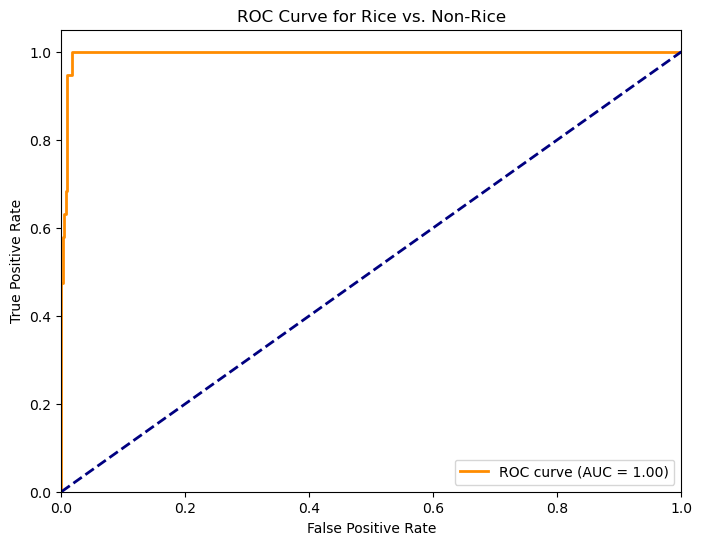

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

# Load the dataset (make sure to adjust the file path)
data = pd.read_csv('Crop_Recommendation.csv')

# Replace class labels to create a binary classification problem (rice vs. non-rice)
data['label'] = np.where(data['label'] == 'rice', 'rice', 'non-rice')

# Extract features (X) and target labels (y)
X = data.drop(columns=['label'])
y = data['label']

# Split the data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a logistic regression classifier
logistic_reg = LogisticRegression(max_iter=1000)
logistic_reg.fit(X_train, y_train)

# Calculate probabilities for the positive class ('rice') in the test set
y_prob = logistic_reg.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label='rice')

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Rice vs. Non-Rice')
plt.legend(loc='lower right')
plt.show()


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# 加载 SMS Spam Collection 数据集
data = pd.read_csv('SMSSpamCollection', sep='\t', header=None, names=['label', 'message'])

# 将数据分成训练集（80%）和测试集（20%）
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.2, random_state=42)

# 创建 TF-IDF 向量化器
tfidf_vectorizer = TfidfVectorizer(lowercase=True, stop_words='english')

# 将文本数据转换成 TF-IDF 向量
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# 初始化并训练 SVM 分类器
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_tfidf, y_train)

# 预测并评估 SVM 分类器
svm_predictions = svm_classifier.predict(X_test_tfidf)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_confusion_matrix = confusion_matrix(y_test, svm_predictions)

# 初始化并训练随机森林分类器
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)

# 预测并评估随机森林分类器
rf_predictions = rf_classifier.predict(X_test_tfidf)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)

# 打印结果
print("SVM 分类器:")
print(f"准确率: {svm_accuracy:.2f}")
print("混淆矩阵:")
print(svm_confusion_matrix)

print("\n随机森林分类器:")
print(f"准确率: {rf_accuracy:.2f}")
print("混淆矩阵:")
print(rf_confusion_matrix)


SVM 分类器:
准确率: 0.99
混淆矩阵:
[[965   1]
 [  8 141]]

随机森林分类器:
准确率: 0.98
混淆矩阵:
[[966   0]
 [ 21 128]]
